# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow.keras as keras

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

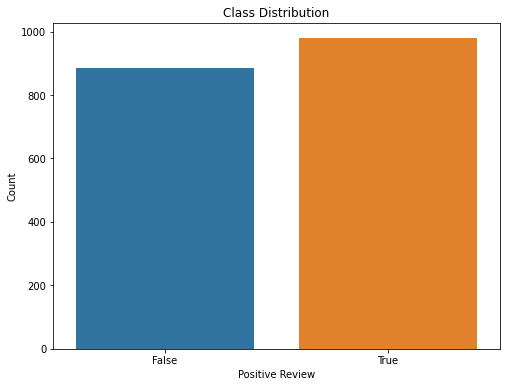

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [4]:
# Prepare the data
X = df['Review'].values
y = df['Positive Review'].values.astype(int)  # Convert True/False to 1/0
df.drop_duplicates(inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Positive Review', data=df)
plt.title('Class Distribution')
plt.xlabel('Positive Review')
plt.ylabel('Count')
plt.show()
df.head()

There doesnt appear to be any class imbalance. Additionaly, all repetitive reviews have been removed.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

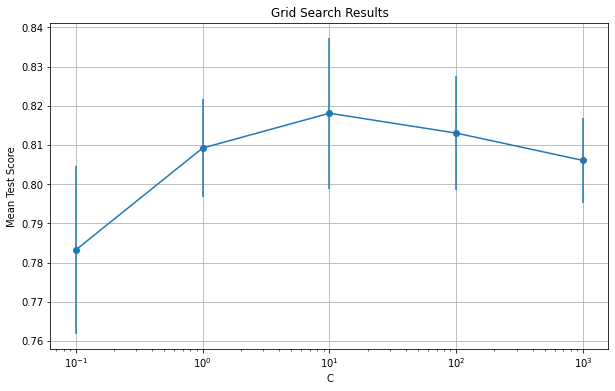

Accuracy of Logistic Regression: 0.8329113924050633


In [5]:
# Perform grid search to find the best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
model = LogisticRegression(max_iter=5000)
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train_tfidf, y_train)
best_c = grid_search.best_params_['C']

# Plotting Grid Search Results
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.errorbar(cv_results['param_C'], cv_results['mean_test_score'], yerr=cv_results['std_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.show()

# Initialize the best model
model_best = LogisticRegression(C=best_c, max_iter=5000)

# Fit the model on the training data
model_best.fit(X_train_tfidf, y_train)

# Make predictions on test data
class_label_predictions_lr = model_best.predict(X_test_tfidf)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, class_label_predictions_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)

As you can see, the accuracy of the logistic regression module for classifying the book reviews in approximately 0.833. <br> Now we will compare that to the accuracy of the a neural network.

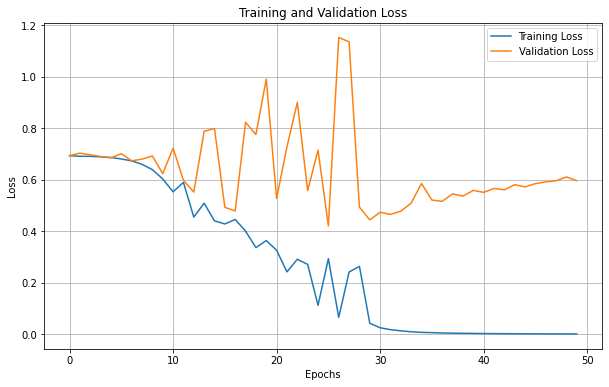

13/13 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.8177
Accuracy of Neural Network: 0.8177215456962585


In [6]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object:
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)

# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epochs(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

num_epochs = 50
X_train_tfidf_array = X_train_tfidf.toarray()
history = nn_model.fit(X_train_tfidf_array, y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)], validation_split=0.2)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

class_label_predictions_nn_probs = nn_model.predict(X_test_tfidf.toarray())
class_label_predictions_nn = (class_label_predictions_nn_probs > 0.5).astype(int)

# Evaluate and print loss and accuracy on test set
X_test_tfidf_array = X_test_tfidf.toarray()
loss, accuracy_nn = nn_model.evaluate(X_test_tfidf_array, y_test)
print('Accuracy of Neural Network:', accuracy_nn)

According to this outcome of this specific rendering of the neural network, the accuracy is 0.808, which is less than that of the logistic regression. Not only is the logistic regression model currently more accurate, it also requires less computational power and is therfore more efficient.

Another option is to implement a hybrid model that uses neural networks for feature extraction followed by logistic regression for classification.

Accuracy of Hybrid Model: 0.8151898734177215


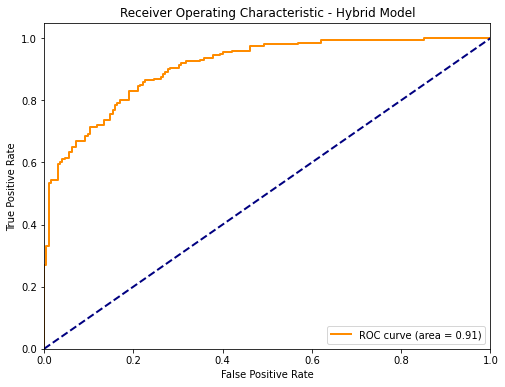

In [7]:
from sklearn.metrics import roc_curve, auc

# Extract features using the neural network
X_train_features = nn_model.predict(X_train_tfidf.toarray()) 
X_test_features = nn_model.predict(X_test_tfidf.toarray())   

# Train logistic regression on the extracted features
log_reg = LogisticRegression(max_iter=5000, C=best_c)
log_reg.fit(X_train_features, y_train)

# Use logistic regression to make predictions
class_label_predictions_hybrid = log_reg.predict(X_test_features)

# Calculate the accuracy of the hybrid model
accuracy_hybrid = accuracy_score(y_test, class_label_predictions_hybrid)
print("Accuracy of Hybrid Model:", accuracy_hybrid)

# Compute ROC curve and ROC area for the hybrid model
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_features)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Hybrid Model')
plt.legend(loc="lower right")
plt.show()



Ensable methods are another way to improve accuracy. For example, random forest:

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on test data
class_label_predictions_rf = rf_model.predict(X_test_tfidf)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, class_label_predictions_rf)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 0.769620253164557


In Summary: <br>
Logistic Regression: 0.8329 <br>
Neural Network: 0.808 <br> 
Hybrid Model: 0.812 <br>
Random Forest: 0.7696 <br>


In this case, the Logistic Regression, the Neural Network, and the hybrid model seem to outperform the Random Forest model. <br>
This analysis of different Machine Learning Models is incomplete though, since I'm using accuracy as my main metric.
<br> Another way to evaluate a model is using a confusion matrix.









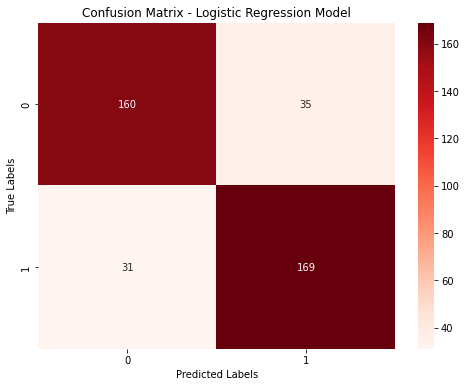

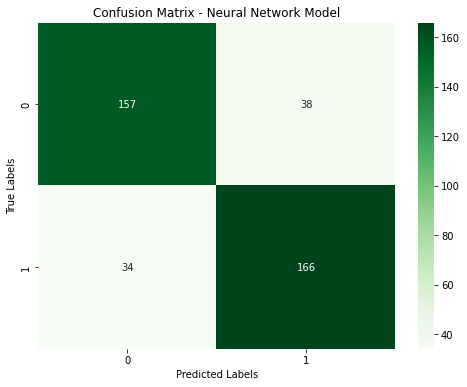

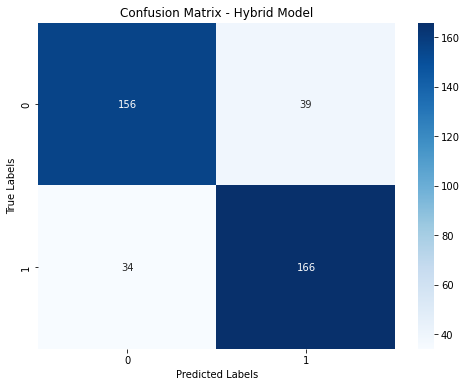

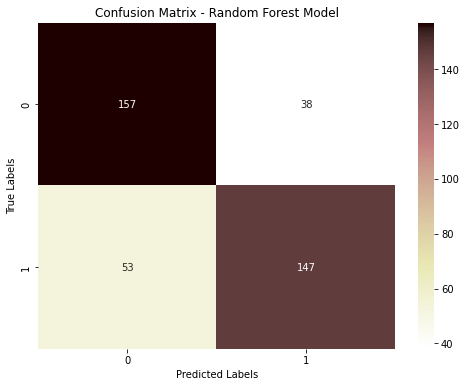

In [9]:
from sklearn.metrics import confusion_matrix


# Visualize the confusion matrix for the logistic reg
conf_matrix_lr = confusion_matrix(y_test, class_label_predictions_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

# Visualize the confusion matrix for the neural network
conf_matrix_nn = confusion_matrix(y_test, class_label_predictions_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Neural Network Model")
plt.show()

# Visualize confusion matrix for the hybrid model
conf_matrix_hybrid = confusion_matrix(y_test, class_label_predictions_hybrid)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hybrid, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Hybrid Model")
plt.show()

# Visualize the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, class_label_predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="pink_r")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()



Ultimately, the logistic regression model seems to be the best option.